                                    IMPORTING REQUIRED LIBRARIES AND MODULES

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support,recall_score,precision_score,f1_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")
import sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
import imblearn
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from numpy import where
from time import time
%matplotlib inline

Creating Instances

In [25]:
label_encoder=LabelEncoder()
scaler_min=MinMaxScaler()
scaler_std=StandardScaler()

                                    
                                READING DATASETS INTO DATAFRAME

In [26]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
           "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
           "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [27]:
df_test = pd.read_csv("NSL_KDD_Test.csv", header=None, names=columns)
df_train = pd.read_csv("NSL_KDD_Train.csv", header=None, names=columns)

In [28]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [29]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


                                        Extrapolatry Data Analysis(EDA)

In [30]:
print("Number of instances in train dataset:", df_train.shape[0])
print("Number of instances in test dataset:", df_test.shape[0])

Number of instances in train dataset: 125973
Number of instances in test dataset: 22544


In [31]:
df_train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [32]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,22544.0,218.859076,1407.176612,0.0,0.00,0.00,0.0000,57715.0
src_bytes,22544.0,10395.450231,472786.431088,0.0,0.00,54.00,287.0000,62825648.0
dst_bytes,22544.0,2056.018808,21219.297609,0.0,0.00,46.00,601.0000,1345927.0
land,22544.0,0.000311,0.017619,0.0,0.00,0.00,0.0000,1.0
wrong_fragment,22544.0,0.008428,0.142599,0.0,0.00,0.00,0.0000,3.0
urgent,22544.0,0.000710,0.036473,0.0,0.00,0.00,0.0000,3.0
hot,22544.0,0.105394,0.928428,0.0,0.00,0.00,0.0000,101.0
num_failed_logins,22544.0,0.021647,0.150328,0.0,0.00,0.00,0.0000,4.0
logged_in,22544.0,0.442202,0.496659,0.0,0.00,0.00,1.0000,1.0
num_compromised,22544.0,0.119899,7.269597,0.0,0.00,0.00,0.0000,796.0


In [33]:
df_train.info()
# NO NULL ENTRIES ARE AVAILABLE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [34]:
df_test.info()
# NO NULL ENTRIES ARE AVAILABLE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

No Null Values Confirmed with below two cells and heatmap shown below

In [35]:
df_train.isnull().values.any()

False

In [36]:
df_test.isnull().values.any()

False

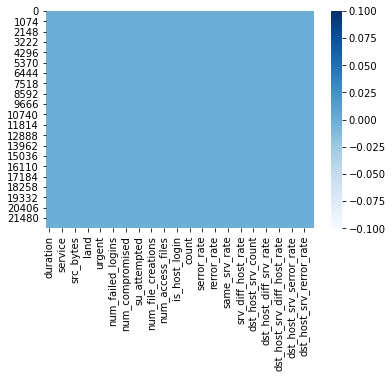

In [37]:
sns.heatmap(df_test.isnull(), cmap="Blues")

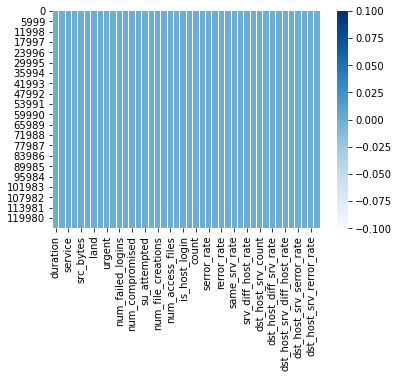

In [38]:
sns.heatmap(df_train.isnull(), cmap="Blues")

Exploring unique values in each attribute

In [39]:
df_train.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [40]:
df_test.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [41]:
# this is deleted because it had only zero value filled in the whole dataset
df_train.drop(columns="num_outbound_cmds", inplace=True)
df_test.drop(columns="num_outbound_cmds", inplace=True)

<BarContainer object of 41 artists>

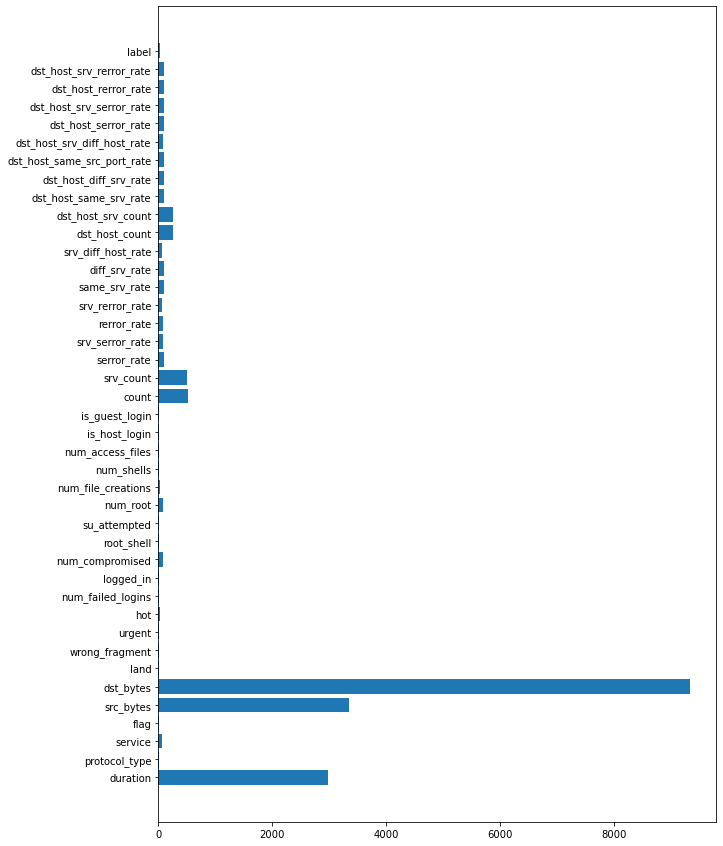

In [42]:
uniqueValues = df_train.nunique().tolist()
labels = df_train.columns
plt.figure(figsize=(10, 15))
plt.barh(labels, uniqueValues)

Checking Datatype of each attribute

In [43]:
df_train.dtypes
# protocol_type ,service and flag have object data type which need to be handled later before training the model

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [44]:
df_test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

Analysis based on Correlation 

In [45]:
df_train.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.012249,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,-0.401084,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.010928,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219


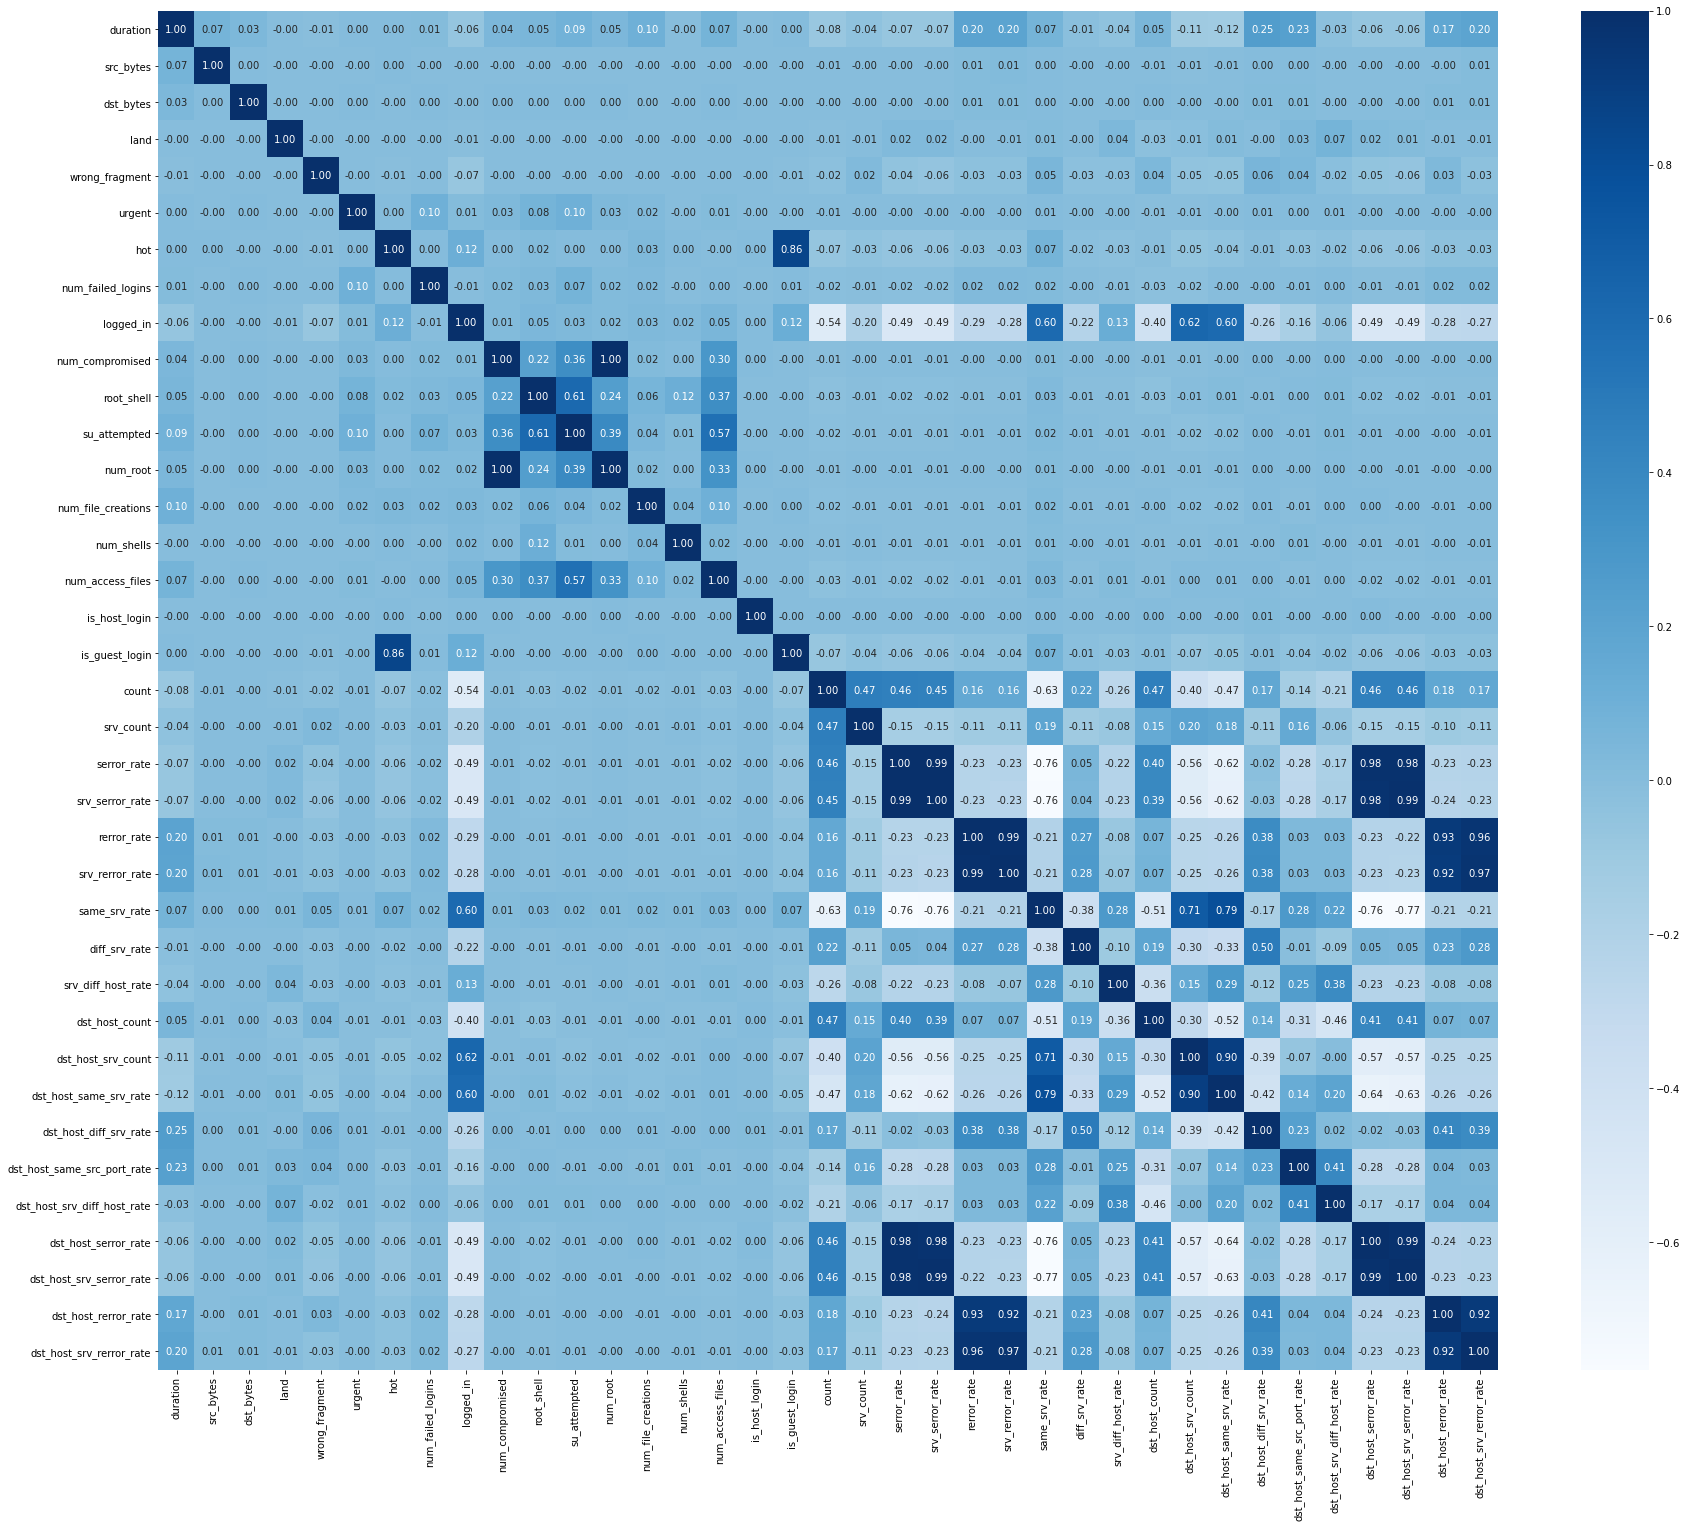

In [46]:
plt.subplots(figsize=(30, 25))
sns.heatmap(df_train.corr(), cmap="Blues", annot=True, fmt='0.2f')
plt.savefig("Correlation heatmap",dpi=500)

Attacks Analysis

In [47]:
# Number of attacks in the Dataset
df_train[df_train["label"] != 'normal']['label'].nunique()

22

In [48]:
df_train[df_train["label"] != 'normal']['label'].value_counts()
# from it is clear that neptune attack is most common and spy attack is the least attackers prefer

neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Attacks like spy,perl,phf,mutlihop,ftp_write,loadmodule, have instances less than 10 so we will drop these since there will not be sufficient training data.
We can also take this threshold till 20 but here till 10 it considered only.

In [49]:
df_train['label'] = df_train['label'].replace(
    ['spy', 'perl', 'phf', 'multihop', 'ftp_write', 'loadmodule'], np.nan)
df_train = df_train.dropna()
df_train['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
Name: label, dtype: int64

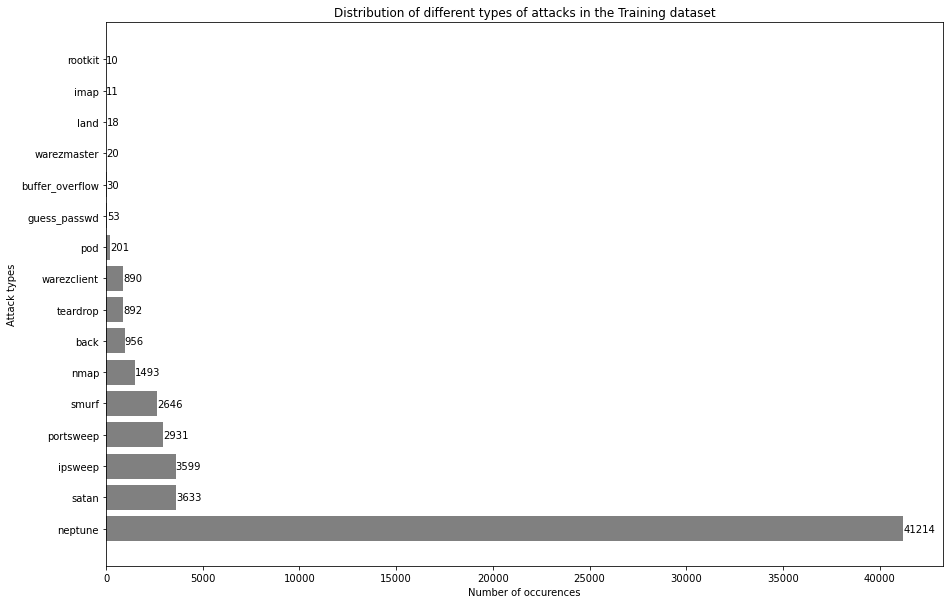

In [50]:
plt.figure(figsize=(15, 10))

attack = ("neptune", 'satan', "ipsweep", "portsweep", 'smurf', "nmap", 'back', 'teardrop', 'warezclient', 'pod', 'guess_passwd', 'buffer_overflow', 'warezmaster',
          "land", 'imap', 'rootkit')
y_pos = np.arange(len(attack))
amount = df_train['label'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='Grey')
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the Training dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1, str(v))
plt.savefig("Attacks in Training Dataset",dpi=500)

In [51]:
df_test['label'] = df_test['label'].replace(
    ['spy', 'perl', 'phf', 'multihop', 'ftp_write', 'loadmodule'], np.nan)
df_test = df_test.dropna()
df_test['label'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
sqlattack             2
udpstorm              2
worm                  2
imap                  1
Name: label, dtype: int64

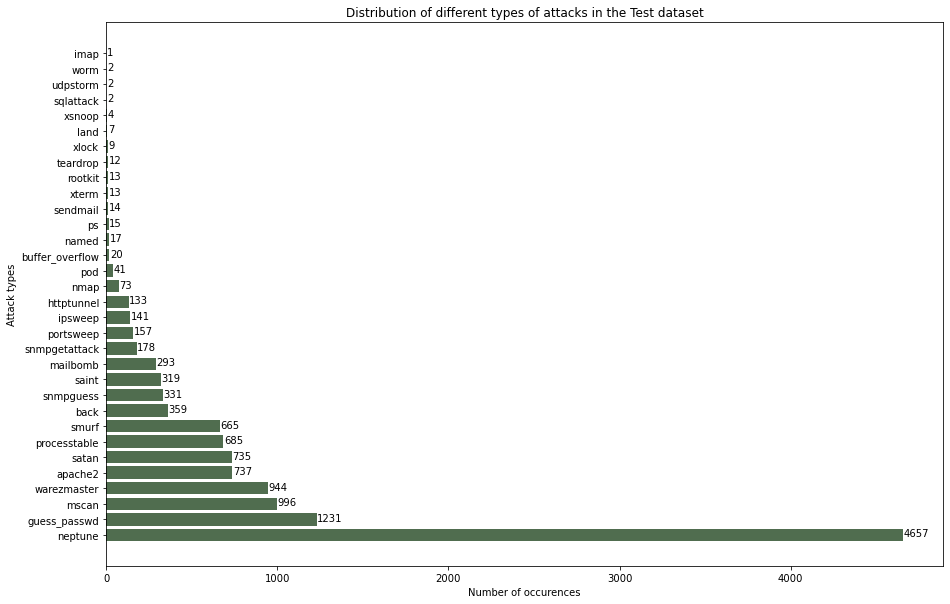

In [52]:
plt.figure(figsize=(15, 10))

attack_test = ("neptune",'guess_passwd','mscan','warezmaster','apache2', 'satan','processtable','smurf', 'back','snmpguess','saint',
          'mailbomb','snmpgetattack', "portsweep", "ipsweep",'httptunnel',"nmap",'pod', 'buffer_overflow','named','ps','sendmail',
          'xterm','rootkit','teardrop','xlock',"land",'xsnoop','sqlattack','udpstorm','worm','imap')
        
y_pos_test = np.arange(len(attack_test))
amount_test = df_test['label'].value_counts()[1:]
plt.barh(y_pos_test, amount_test, align='center', color='#506D4F')
plt.yticks(y_pos_test, attack_test)
plt.title('Distribution of different types of attacks in the Test dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount_test):
    plt.text(v + 3, i-0.1, str(v))
plt.savefig("Attacks in Test Dataset",dpi=500)

Object datatype

In [53]:
for i in list(df_train.columns):
    if(df_train[i].dtypes == "object"):
        print(i)

protocol_type
service
flag
label


In [54]:
def addlabels_for_datatype(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+0.5, round(y[i],2), ha = 'center')

['int64', 'object', 'float64'] [22, 4, 15]


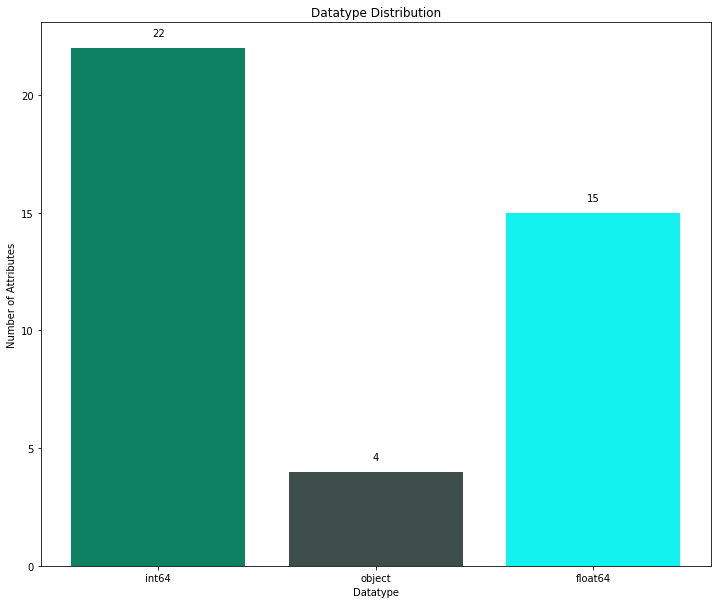

In [55]:
listdata = df_train.dtypes.tolist()
datatype = [22,4,15]


X = ["int64", 'object', 'float64']
Y =datatype
print(X, Y)
plt.figure(figsize=(12, 10))
plt.bar(X, Y, color=["#0D8164","#3D4D49","#13F1EE"])
addlabels_for_datatype(X,Y)
plt.xlabel("Datatype")
plt.ylabel("Number of Attributes")
plt.title("Datatype Distribution")
plt.savefig("Datatype Distribution",dpi=400)



From above cell it is clear that we have 4 columns having object data type and will not contribute to the model training.so converting them into numberical values by encoding Except Label that is our target column.


In [56]:
print('Training set:')
for col_name in df_train.columns:
    if df_train[col_name].dtypes == 'object':
        unique_cat = len(df_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(
            col_name=col_name, unique_cat=unique_cat))
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object':
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(
            col_name=col_name, unique_cat=unique_cat))

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 17 categories
Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 33 categories


                                          Dataset Preprocessing

# It is also clear that test dataset have 33 unique attacks while training dataset have 17 so (33-17=16) attacks are new for the training model.Need to add those into the training dataset also.

In [57]:
df_train.duplicated().sum()

0

In [58]:
df_test.duplicated().sum()

0

Handling OBJECT datatype attribues: Service,Flag,Protocol_Type using Label Encoder

In [59]:
df_train['service']= label_encoder.fit_transform(df_train['service'])
df_test['service']=label_encoder.fit_transform(df_test['service'])
df_train['service'].value_counts()

24    40334
49    21853
12     9043
54     7313
20     6850
      ...  
61        3
22        2
27        2
3         2
25        1
Name: service, Length: 70, dtype: int64

In [60]:
df_train['protocol_type'].replace({'tcp':1,'udp':2,'icmp':3},inplace=True)
df_test['protocol_type'].replace({ 'tcp':1,'udp':2,'icmp':3},inplace=True)
df_train['protocol_type'].value_counts()

1    102656
2     14993
3      8291
Name: protocol_type, dtype: int64

In [61]:
df_train['flag'].replace({'SF':11,'S0':10,'REJ':9,'RSTR':8,'RSTO':7,'S1':6,'SH':5,'S2':4,'RSTOS0':3,'S3':2,'OTH':1},inplace=True)
df_test['flag'].replace({'SF':11,'S0':10,'REJ':9,'RSTR':8,'RSTO':7,'S1':6,'SH':5,'S2':4,'RSTOS0':3,'S3':2,'OTH':1},inplace=True)
df_train['flag'].value_counts()

11    74912
10    34851
9     11233
8      2421
7      1562
6       365
5       271
4       127
3       103
2        49
1        46
Name: flag, dtype: int64

Handling Label:
Train=17
Test=33

In [62]:
test_attack=df_test['label'].unique().tolist()
train_attack=df_train['label'].unique().tolist()
print(len(test_attack))
print(len(train_attack))
l1=list(set(test_attack)-set(train_attack))
print(l1)
# df_test['label'] = df_test['label'].replace(
#     l1, np.nan)
# df_test = df_test.dropna()
# df_test['label'].nunique()

33
17
['saint', 'ps', 'sqlattack', 'snmpguess', 'named', 'worm', 'mscan', 'udpstorm', 'sendmail', 'apache2', 'snmpgetattack', 'xlock', 'httptunnel', 'xterm', 'xsnoop', 'mailbomb', 'processtable']


In [63]:
df_required=df_test[(df_test['label']=='sendmail') | (df_test['label']=='mailbomb') | (df_test['label']=='worm') | (df_test['label']=='xsnoop') | (df_test['label']=='processtable') |
(df_test['label']=='httptunnel') | (df_test['label']=='sqlattack') | (df_test['label']=='mscan') | (df_test['label']=='udpstorm') | (df_test['label']=='xlock') |
(df_test['label']=='apache2') | (df_test['label']=='saint') | (df_test['label']=='snmpgetattack') | (df_test['label']=='xterm') |(df_test['label']=='named') | (df_test['label']=='ps') | (df_test['label']=='snmpguess')]

In [64]:
df_train=pd.concat([df_train,df_required],axis=0)

In [65]:
df_train['label'].nunique()

34

In [66]:
test_attack=df_test['label'].unique().tolist()
train_attack=df_train['label'].unique().tolist()
print(len(test_attack))
print(len(train_attack))
l1=list(set(test_attack)-set(train_attack))
print(l1)

33
34
[]


In [67]:
df_train['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4},inplace=True)
df_test['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4},inplace=True)



In [68]:
df_train['label'].value_counts()

0    67343
1    47646
2    12971
3     1660
4       70
Name: label, dtype: int64

In [69]:
map_to_class={0:'normal',1:'DoS',2:"Probe",3:'R2L',4:"U2R"}

FROM BELOW GRAPH IT IS CLEAR THAT ATTACKS BELONGING TO R2L AND U2R HAVE VERY LOW NUMBER OF INSTANCES<br> WHICH NEEDS TO BE HANDLED TO MAKE A  GOOD MODEL

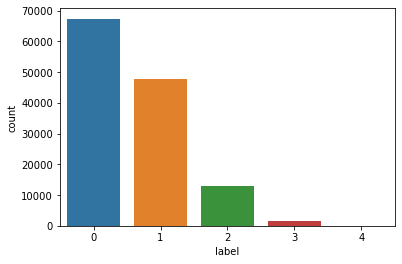

In [70]:
sns.countplot(df_train['label'])

In [71]:
df_test['label'].value_counts()

0    9711
1    7460
3    2862
2    2421
4      63
Name: label, dtype: int64

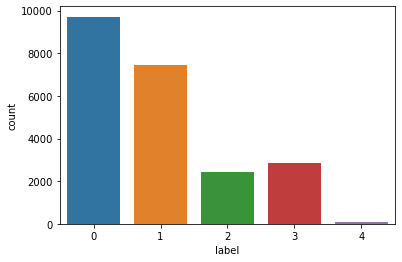

In [72]:
sns.countplot(df_test['label'])

In [73]:
df_train_label=df_train['label']
df_test_label=df_test['label']

STANDARDIZING DATASET BEFORE FEATURE SELECTION

In [74]:
columns_before_normal = ["duration", 'service',"protocol_type", "flag", "src_bytes",
           "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files",
           "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]

In [75]:
df_train_int=df_train[columns_before_normal]

In [76]:
df_test_int=df_test[columns_before_normal]

USING MINMAX SCALER FOR STANDARDIZING

In [77]:
scaler_min.fit(df_train_int)
x_train = scaler_min.transform(df_train_int)
scaler_min.fit(df_test_int)
x_test = scaler_min.transform(df_test_int)

In [78]:
df_train_minmax_without_label=pd.DataFrame(x_train,columns=columns_before_normal)

In [79]:
df_test_minmax_without_label=pd.DataFrame(x_test,columns=columns_before_normal)

In [80]:
df_train_label

0        0
1        0
2        1
3        0
4        0
        ..
22517    1
22519    1
22525    1
22537    1
22543    2
Name: label, Length: 129690, dtype: int64

In [81]:
df_train_minmax_without_label.shape

(129690, 40)

In [82]:
df_train_label.shape

(129690,)

In [83]:
cols=df_train_minmax_without_label.columns.tolist()

In [84]:
print(len(cols))

40


In [85]:
train_x=df_train_minmax_without_label[cols]
train_y=df_train_label

HANDLING LABEL CLASS WHICH WERE LOW IN NUMBER BY USING "SMOTE" TECHNIQUE

Class=0, n=67343 (51.926%)
Class=1, n=47646 (36.738%)
Class=3, n=1660 (1.280%)
Class=2, n=12971 (10.002%)
Class=4, n=70 (0.054%)


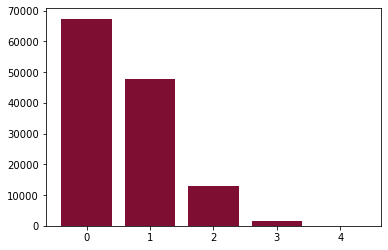

<Figure size 432x288 with 0 Axes>

In [86]:
df_train_data=df_train.values
X_before, y_before = df_train_data[:, :-1], df_train_data[:, -1]
counter = Counter(y_before)
for k,v in counter.items():
	per = v / len(y_before) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(),color="#7E0F32")

plt.show()
plt.savefig("Labels before SMOTE in bar chart",dpi=500)


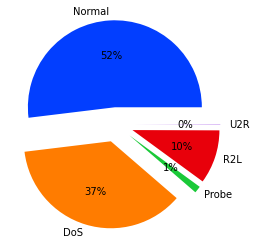

In [87]:
explode = [0.2, 0.2, 0.2, 0.2, 0.2]
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(counter.values(), labels=['Normal','DoS','Probe','R2L',"U2R"], colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
plt.savefig("Labels before Smote in Pie Chart",dpi=500)
# displaying chart
plt.show()

In [88]:
label_list=train_y.tolist()
train_x['label']=label_list
train_x

,duration,service,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.000000,0.289855,0.0,1.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0.000000,0.637681,0.5,1.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0.000000,0.710145,0.0,0.9,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0.000000,0.347826,0.0,1.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0.000000,0.347826,0.0,1.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129685,0.129914,0.797101,0.0,1.0,0.000000e+00,3.358939e-08,0.0,0.0,0.0,0.0,...,0.752941,0.75,0.02,0.00,0.00,0.36,0.37,0.01,0.01,1
129686,0.142233,0.797101,0.0,1.0,0.000000e+00,1.145093e-08,0.0,0.0,0.0,0.0,...,0.035294,0.04,0.85,0.00,0.00,0.00,0.00,0.84,0.00,1
129687,0.035762,0.318841,0.0,0.7,4.039526e-05,0.000000e+00,0.0,0.0,0.0,0.0,...,0.956863,0.96,0.01,0.00,0.00,0.02,0.02,0.55,0.57,1
129688,0.000017,0.710145,0.0,1.0,1.883383e-06,2.236748e-07,0.0,0.0,0.0,0.0,...,0.729412,0.73,0.13,0.00,0.00,0.00,0.00,0.26,0.00,1


In [89]:
#this  usually takes 3-4 minutes
data = train_x.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
# y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution

# print(counter)


Class=0, n=67343 (20.000%)
Class=1, n=67343 (20.000%)
Class=3, n=67343 (20.000%)
Class=2, n=67343 (20.000%)
Class=4, n=67343 (20.000%)


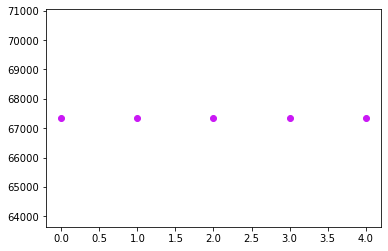

In [90]:
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.scatter(counter.keys(), counter.values(),color="#CA18F5")
plt.show()

Class=0, n=67343 (20.000%)
Class=1, n=67343 (20.000%)
Class=3, n=67343 (20.000%)
Class=2, n=67343 (20.000%)
Class=4, n=67343 (20.000%)


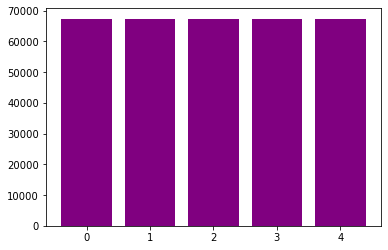

In [91]:
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(),color="purple")
plt.savefig("Labels after SMOTE in Bar chart",dpi=500)
plt.show()


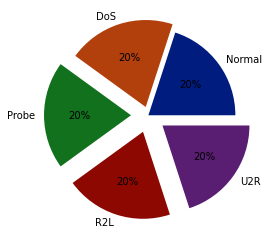

In [92]:
explode = [0, 0.1, 0.2, 0.2, 0.2]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(counter.values(), labels=['Normal','DoS','Probe','R2L',"U2R"], colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
plt.savefig("Labels after Smote in Pie Chart",dpi=500)
# displaying chart
plt.show()

CONVERTING THE DATA BACK INTO DATAFRAME FORM

In [93]:
df_train_X=pd.DataFrame(X,columns=cols)
df_train_X

,duration,service,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.289855,0.000000,1.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.588235,0.098039,0.17,0.030000,0.170000,0.000000,0.000000,0.00,0.05,0.00
1,0.000000,0.637681,0.500000,1.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,1.000000,0.003922,0.00,0.600000,0.880000,0.000000,0.000000,0.00,0.00,0.00
2,0.000000,0.710145,0.000000,0.9,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,1.000000,0.101961,0.10,0.050000,0.000000,0.000000,1.000000,1.00,0.00,0.00
3,0.000000,0.347826,0.000000,1.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,...,0.117647,1.000000,1.00,0.000000,0.030000,0.040000,0.030000,0.01,0.00,0.01
4,0.000000,0.347826,0.000000,1.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,...,1.000000,1.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,0.003823,0.447006,0.000000,1.0,4.299856e-07,5.797254e-06,0.0,0.0,0.0,0.009016,...,0.567143,0.006320,0.01,0.026942,0.006942,0.000000,0.006942,0.00,0.00,0.00
336711,0.000000,0.395727,0.166103,1.0,9.629404e-10,1.657325e-06,0.0,0.0,0.0,0.000000,...,0.003922,0.030110,1.00,0.000000,1.000000,0.180304,0.000000,0.00,0.00,0.00
336712,0.000000,0.360419,0.117378,1.0,6.804674e-10,1.898015e-06,0.0,0.0,0.0,0.000000,...,0.004842,0.034852,1.00,0.000000,0.882622,0.206616,0.000000,0.00,0.00,0.00
336713,0.000000,0.289855,0.000000,1.0,0.000000e+00,4.163891e-06,0.0,0.0,0.0,0.000000,...,0.006724,0.208343,1.00,0.000000,1.000000,0.012853,0.000000,0.00,0.00,0.00


In [94]:
label="label"
df_train_Y=pd.DataFrame(y)

In [95]:
df_train_Y.rename(columns={0:"label"},inplace=True)

In [96]:
train_x=df_train_X
train_y=df_train_Y

                                     Feature Selection

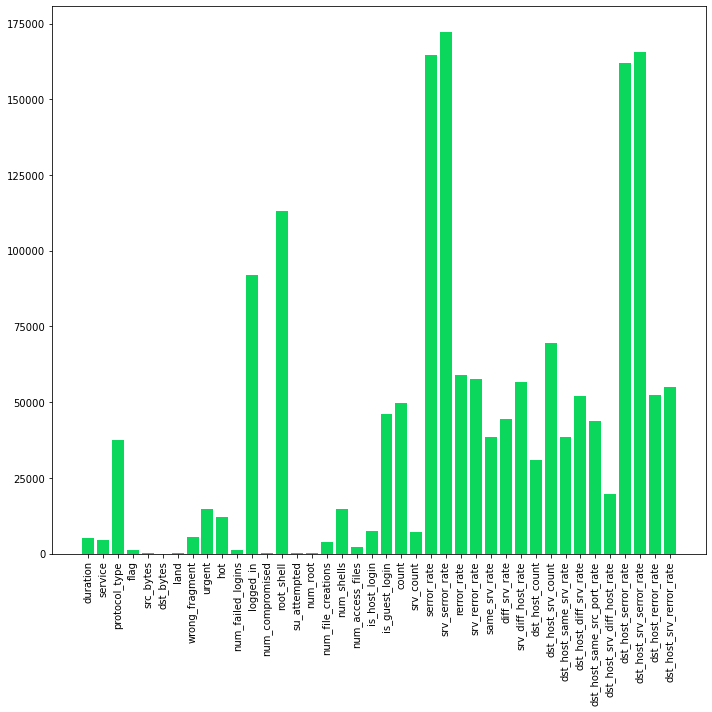

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
features = SelectKBest(score_func=chi2, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit(train_x, train_y)
# plot the score associated with each feature
plt.figure(figsize=(10,10))
plt.bar([i for i in range(len(features.scores_))], features.scores_,color='#0BD75C')
plt.xticks([i for i in range(len(features.scores_))], df_train_X.columns)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('features', dpi=500)

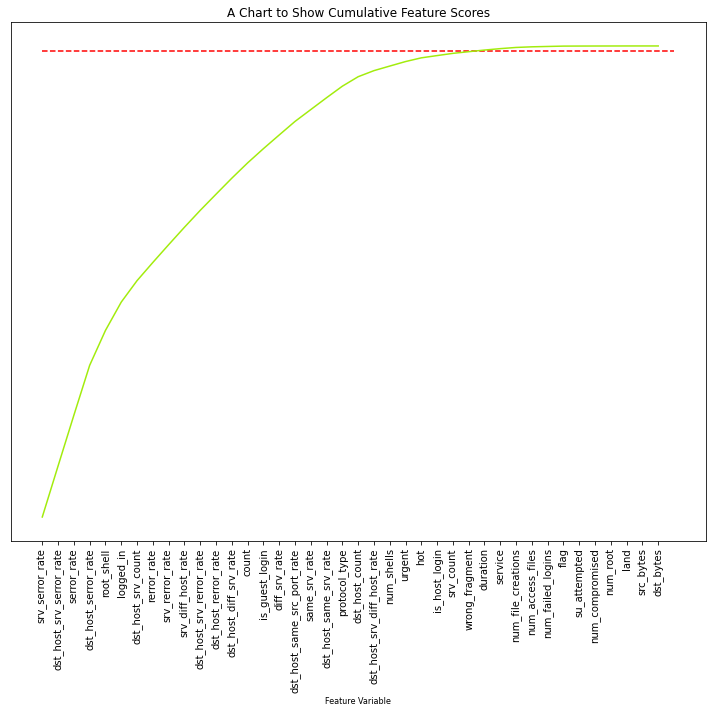

In [98]:
# sort the features by importance score
plt.figure(figsize=(10,10))
feature_importances = zip(df_train_X.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances,color='#A2EC0D')

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical',)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores')
#plt.figure(figsize=(500,200))
plt.tight_layout()
plt.savefig('cum_features', dpi=500)

# Above Chart Shows that 99% of the feature score is from first 25 columns and rest of the columns doesn't contribute much so taking only those 25 features for further modelling

In [99]:
# perform selectkbest with k=40
features = SelectKBest(score_func=chi2, k=25)
fit = features.fit(train_x,train_y)
train_x = fit.transform(train_x)


In [100]:
new_features = df_train_X.columns[features.get_support(indices=True)]

In [101]:
new_features

Index(['protocol_type', 'urgent', 'hot', 'logged_in', 'root_shell',
       'num_shells', 'is_guest_login', 'count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

to_check have rest 15 attributes which should not be part of the resulting dataframe

In [102]:
to_Check=['is_host_login','root_shell','num_failed_logins','su_attempted','num_root','urgent','num_file_creations','num_shells','land','num_access_files']

In [103]:
result1=new_features

In [104]:
for i in to_Check:
    if( i in result1):
        print(i)
print("Not there")
    

root_shell
urgent
num_shells
Not there


In [105]:
df_train_model=df_train_X[result1]
df_test_model=df_test_minmax_without_label[result1]

MAKING DATASETS READY FOR MODELLING

In [106]:
X_train=df_train_model
Y_train=df_train_Y['label']
X_test=df_test_model
Y_test=df_test_label

CHECKING IF THE FINAL DATASET HAVE ANY NULL VALUES OR NOT

In [107]:
Y_test.isnull().any().any()

False

In [108]:
Y_train.isnull().any().any()

False

In [109]:
X_test.isnull().any().any()

False

In [110]:
X_train.isnull().any().any()

False

CHECKING SHAPE OF THE FINAL DATASETS

In [111]:
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(336715, 25) (22517, 25) (336715,) (22517,)


                                     TRAINING AND TESTING OF MACHINE LEARNING ALGORITHMS 

# DECISION TREE

In [112]:
clf1 = DecisionTreeClassifier(random_state=0)
t0 = time()
clf1.fit(X_train, Y_train)
tt1 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt1, 3)))

Classifier trained in 5.811 seconds.


In [113]:

t0 = time()
predDT = clf1.predict(X_test)
tt12 = time() - t0
print("Predicted in {} seconds".format(round(tt12, 3)))

Predicted in 0.012 seconds


In [114]:
accDT = accuracy_score(Y_test, predDT)
print("-------------------------------ACCURACY SCORE-------------------------------------------------------")
print("Accuracy of DT is {}.".format(round(accDT, 4)))
print("-------------------------------CONFUSION MATRIX-------------------------------------------------------")
print("Confusion Matrix is: \n",confusion_matrix(Y_test, predDT))
print("-------------------------------CLASSIFICATION REPORT-------------------------------------------------------")
print("Classification Report is: \n",classification_report(Y_test, predDT))


-------------------------------ACCURACY SCORE-------------------------------------------------------
Accuracy of DT is 0.8746.
-------------------------------CONFUSION MATRIX-------------------------------------------------------
Confusion Matrix is: 
 [[9211   92  190  209    9]
 [ 168 7194   84    2   12]
 [ 175   22 2224    0    0]
 [1779    4   23 1031   25]
 [  15    0    0   14   34]]
-------------------------------CLASSIFICATION REPORT-------------------------------------------------------
Classification Report is: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      9711
           1       0.98      0.96      0.97      7460
           2       0.88      0.92      0.90      2421
           3       0.82      0.36      0.50      2862
           4       0.42      0.54      0.48        63

    accuracy                           0.87     22517
   macro avg       0.78      0.75      0.75     22517
weighted avg       0.88      0.87   

# RANDOM FOREST

In [115]:
# this usually takes 1-2 minutes
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=40,n_estimators=300,n_jobs=-1)
t0 = time()
clf2.fit(X_train, Y_train)
tt2 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt2, 3)))

Classifier trained in 122.961 seconds.


In [116]:
t0 = time()
predRF = clf2.predict(X_test)
tt22 = time() - t0
print("Predicted in {} seconds".format(round(tt22, 3)))
print(predRF)

Predicted in 0.774 seconds
[1. 1. 0. ... 1. 0. 2.]


In [117]:
accRF = accuracy_score(Y_test, predRF)
print("-------------------------------ACCURACY SCORE-------------------------------------------------------")
print("Accuracy of DT is {}.".format(round(accRF, 4)))
print("-------------------------------CONFUSION MATRIX-------------------------------------------------------")
print("Confusion Matrix is: \n",confusion_matrix(Y_test, predRF))
print("-------------------------------CLASSIFICATION REPORT-------------------------------------------------------")
print("Classification Report is: \n",classification_report(Y_test, predRF))



-------------------------------ACCURACY SCORE-------------------------------------------------------
Accuracy of DT is 0.88.
-------------------------------CONFUSION MATRIX-------------------------------------------------------
Confusion Matrix is: 
 [[9216   63  215  211    6]
 [  71 7271  117    1    0]
 [  35    1 2385    0    0]
 [1946    0    2  907    7]
 [  19    0    0    8   36]]
-------------------------------CLASSIFICATION REPORT-------------------------------------------------------
Classification Report is: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      9711
           1       0.99      0.97      0.98      7460
           2       0.88      0.99      0.93      2421
           3       0.80      0.32      0.45      2862
           4       0.73      0.57      0.64        63

    accuracy                           0.88     22517
   macro avg       0.84      0.76      0.78     22517
weighted avg       0.88      0.88     

# NAIVE-BAYES

In [118]:
from sklearn.naive_bayes import BernoulliNB
clf3 = BernoulliNB()
t0 = time()
clf3.fit(X_train, Y_train)
tt3 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt3, 3)))

Classifier trained in 0.798 seconds.


In [119]:
t0 = time()
predNB = clf3.predict(X_test)
tt32 = time() - t0
print("Predicted in {} seconds".format(round(tt32, 3)))
print(predNB)

Predicted in 0.043 seconds
[2. 2. 0. ... 4. 0. 2.]


In [120]:
accNB = accuracy_score(Y_test, predNB)
print("-------------------------------ACCURACY SCORE-------------------------------------------------------")
print("Accuracy of DT is {}.".format(round(accNB, 4)))
print("-------------------------------CONFUSION MATRIX-------------------------------------------------------")
print("Confusion Matrix is: \n",confusion_matrix(Y_test, predNB))
print("-------------------------------CLASSIFICATION REPORT-------------------------------------------------------")
print("Classification Report is: \n",classification_report(Y_test, predNB))


-------------------------------ACCURACY SCORE-------------------------------------------------------
Accuracy of DT is 0.6245.
-------------------------------CONFUSION MATRIX-------------------------------------------------------
Confusion Matrix is: 
 [[7671   22  452 1541   25]
 [  71 2687 3209 1251  242]
 [ 235  266 1908   12    0]
 [ 594   73  430 1755   10]
 [   8    0    0   15   40]]
-------------------------------CLASSIFICATION REPORT-------------------------------------------------------
Classification Report is: 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      9711
           1       0.88      0.36      0.51      7460
           2       0.32      0.79      0.45      2421
           3       0.38      0.61      0.47      2862
           4       0.13      0.63      0.21        63

    accuracy                           0.62     22517
   macro avg       0.52      0.64      0.50     22517
weighted avg       0.76      0.62   

In [121]:
#this usually takes around 30 seconds
clf4 = LogisticRegression()
t0 = time()
clf4.fit(X_train, Y_train)
tt4 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt4, 3)))

Classifier trained in 26.183 seconds.


In [122]:
t0 = time()
predLR = clf4.predict(X_test)
tt42 = time() - t0
print("Predicted in {} seconds".format(round(tt42, 3)))

Predicted in 0.031 seconds


In [123]:
accLR = accuracy_score(Y_test, predLR)
print("-------------------------------ACCURACY SCORE-------------------------------------------------------")
print("Accuracy of DT is {}.".format(round(accLR, 4)))
print("-------------------------------CONFUSION MATRIX-------------------------------------------------------")
print("Confusion Matrix is: \n",confusion_matrix(Y_test, predLR))
print("-------------------------------CLASSIFICATION REPORT-------------------------------------------------------")
print("Classification Report is: \n",classification_report(Y_test, predLR))



-------------------------------ACCURACY SCORE-------------------------------------------------------
Accuracy of DT is 0.8092.
-------------------------------CONFUSION MATRIX-------------------------------------------------------
Confusion Matrix is: 
 [[8095  399  279  525  413]
 [ 611 6214  148  477   10]
 [  64   77 2257   23    0]
 [ 948    5   16 1603  290]
 [   5    2    0    4   52]]
-------------------------------CLASSIFICATION REPORT-------------------------------------------------------
Classification Report is: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      9711
           1       0.93      0.83      0.88      7460
           2       0.84      0.93      0.88      2421
           3       0.61      0.56      0.58      2862
           4       0.07      0.83      0.13        63

    accuracy                           0.81     22517
   macro avg       0.65      0.80      0.66     22517
weighted avg       0.83      0.81   

# SUPPORT VECTOR MACHINE

In [124]:
#this usually takes 75 seconds
from sklearn.svm import LinearSVC
clf5= LinearSVC(random_state=0)
t0 = time()
clf5.fit(X_train, Y_train)
tt5 = time() - t0
print("Classifier trained in {} seconds.".format(round(tt5, 3)))

Classifier trained in 45.872 seconds.


In [125]:
t0 = time()
predSVM = clf5.predict(X_test)
tt52 = time() - t0
print("Predicted in {} seconds".format(round(tt52, 3)))


Predicted in 0.012 seconds


In [126]:
accSVM = accuracy_score(Y_test, predSVM)
print("-------------------------------ACCURACY SCORE-------------------------------------------------------")
print("Accuracy of DT is {}.".format(round(accSVM, 4)))
print("-------------------------------CONFUSION MATRIX-------------------------------------------------------")
print("Confusion Matrix is: \n",confusion_matrix(Y_test, predSVM))
print("-------------------------------CLASSIFICATION REPORT-------------------------------------------------------")
print("Classification Report is: \n",classification_report(Y_test, predSVM))


-------------------------------ACCURACY SCORE-------------------------------------------------------
Accuracy of DT is 0.8202.
-------------------------------CONFUSION MATRIX-------------------------------------------------------
Confusion Matrix is: 
 [[8425   65  313  493  415]
 [ 714 6107  188  443    8]
 [  41   99 2246   25   10]
 [ 876    2   27 1638  319]
 [   3    3    0    4   53]]
-------------------------------CLASSIFICATION REPORT-------------------------------------------------------
Classification Report is: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      9711
           1       0.97      0.82      0.89      7460
           2       0.81      0.93      0.86      2421
           3       0.63      0.57      0.60      2862
           4       0.07      0.84      0.12        63

    accuracy                           0.82     22517
   macro avg       0.66      0.81      0.67     22517
weighted avg       0.85      0.82   

                                             EVALUATION AND ANALYSIS

COMPARING ON THE BASIS OF ACCURACY SCORE

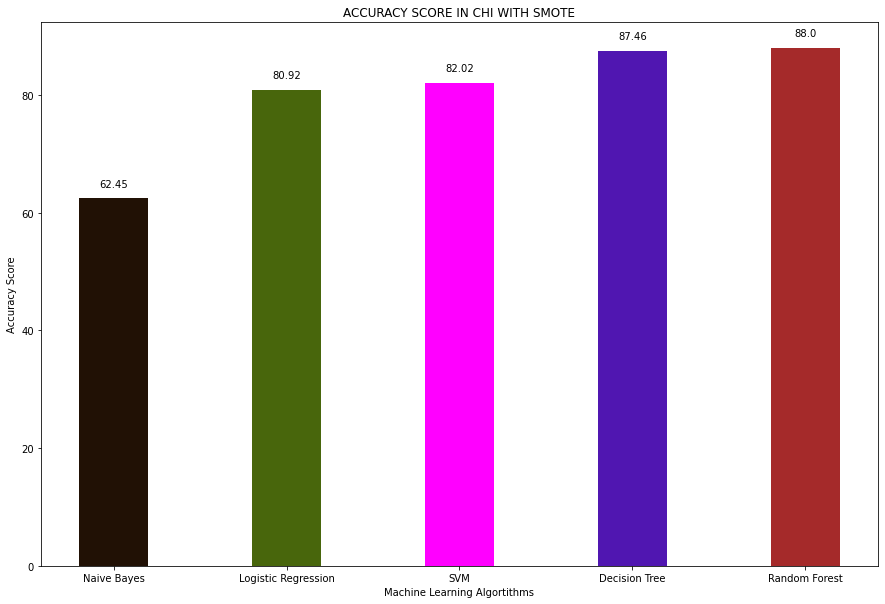

In [127]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+2, round(y[i],2), ha = 'center')
names=['Naive Bayes','Logistic Regression','SVM','Decision Tree','Random Forest']
AccuracyScore=[accNB*100,accLR*100,accSVM*100,accDT*100,accRF*100]
plt.figure(figsize=(15,10))
plt.bar(names,AccuracyScore,0.4,color=['#211105','#48660C','magenta','#5016B1','brown'])
addlabels(names, AccuracyScore)
plt.title("ACCURACY SCORE IN CHI WITH SMOTE")
plt.xlabel("Machine Learning Algortithms")
plt.ylabel("Accuracy Score")
# plt.legend(names)
plt.savefig("Accuracy in CHI with SMOTE",dpi=500)

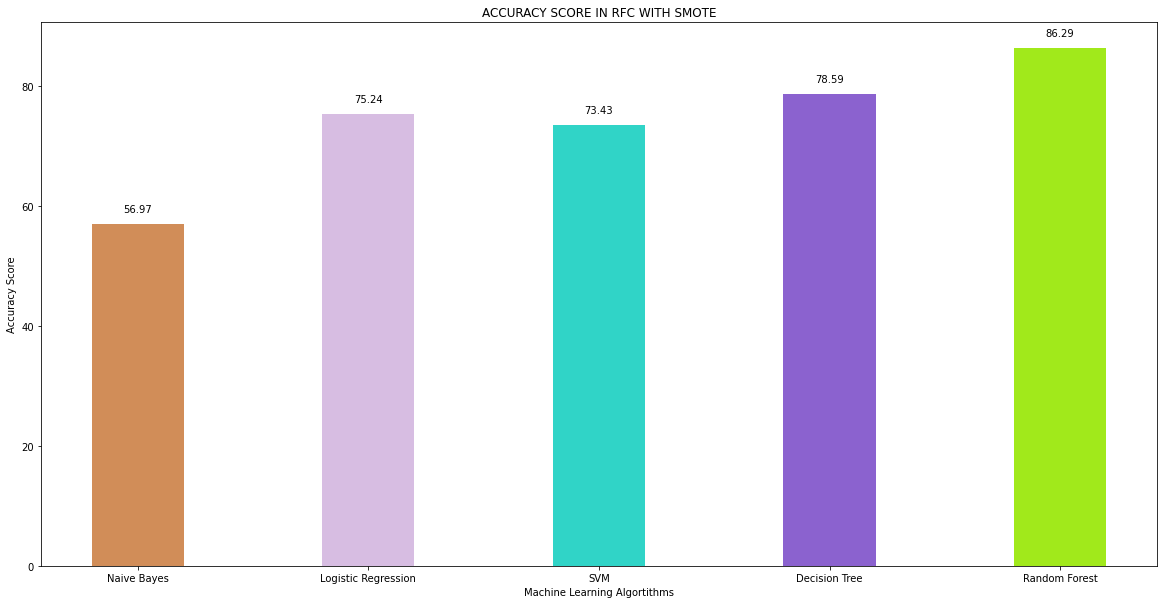

In [128]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+2, round(y[i],2), ha = 'center')
X=['Naive Bayes','Logistic Regression','SVM','Decision Tree','Random Forest']
X_axis = np.arange(len(X))
AccuracyScore_RFC=[56.97,75.24,73.43,78.59,86.29]
plt.figure(figsize=(20,10))
plt.bar(X_axis,AccuracyScore_RFC,0.4,color=['#D18D58','#D7BDE2','#30D4C7','#8B62CF','#A1E91B'])
addlabels(names, AccuracyScore_RFC)
plt.xlabel("Machine Learning Algortithms")
plt.xticks(X_axis, X)
plt.ylabel("Accuracy Score")
plt.title("ACCURACY SCORE IN RFC WITH SMOTE")
plt.savefig("Accuracy in RFC with SMOTE",dpi=500)

Adding both on same barplot

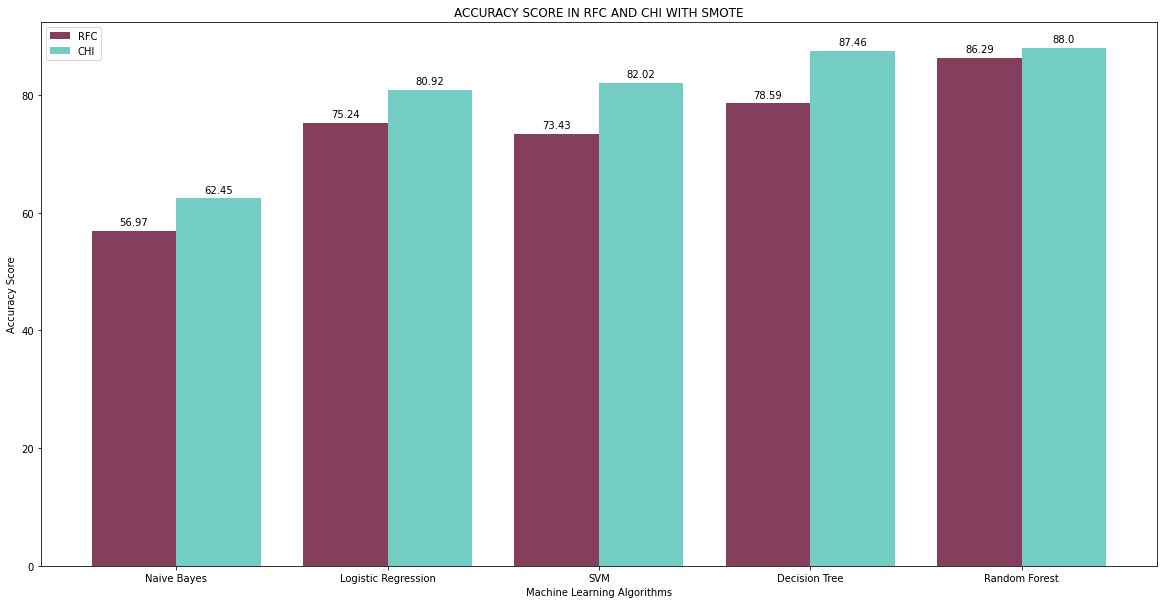

In [129]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.2, y[i]+1, round(y[i],2), ha = 'center')
def addlabels2(x,y):
    for i in range(len(x)):
        plt.text(i+0.2, y[i]+1, round(y[i],2), ha = 'center')

X=['Naive Bayes','Logistic Regression','SVM','Decision Tree','Random Forest']
X_axis = np.arange(len(X))
AccuracyScore_RFC=[56.97,75.24,73.43,78.59,86.29]
plt.figure(figsize=(20,10))
plt.bar(X_axis-0.2,AccuracyScore_RFC,0.4,color='#853F5C')
# ['#E7DBD8','#D7BDE2','#30D4C7','#351072','#A1E91B']
plt.bar(X_axis+0.2,AccuracyScore,0.4,color="#74CDC2")
# ['red','blue','green','yellow','pink']
addlabels(names, AccuracyScore_RFC)
addlabels2(names, AccuracyScore)

plt.title("ACCURACY SCORE IN RFC AND CHI WITH SMOTE")
plt.xticks(X_axis,X)
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy Score")
plt.legend(['RFC','CHI'])


plt.savefig("Comparision on Accuracy of RFC and CHI with SMOTE",dpi=500)

In [130]:
names

['Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

In [131]:
GA=[60.25,69.56,65.3,72.35,74.05]
CHI_WITHOUT_SMOTE=[64.83,78.84,77.87,86.81,87.69]
RFE_WITHOUT_SMOTE=[67.5,70.71,68.7,72.8,73.9]
ALL_FEATURES=[65.32,78.99,77.49,83.66,86.73]

In [132]:
model=names
model_accuracy_RFC=AccuracyScore_RFC
model_accuracy_CHI=AccuracyScore
d=pd.DataFrame({"ALL_FEATURES":ALL_FEATURES,'CHI_SMOTE':model_accuracy_CHI,"CHI_WITHOUT_SMOTE":CHI_WITHOUT_SMOTE,'RFE_SMOTE':model_accuracy_RFC,"RFE_WITHOUT_SMOTE":RFE_WITHOUT_SMOTE,'GA_SMOTE':GA},index=model)
d


,ALL_FEATURES,CHI_SMOTE,CHI_WITHOUT_SMOTE,RFE_SMOTE,RFE_WITHOUT_SMOTE,GA_SMOTE
Naive Bayes,65.32,62.446152,64.83,56.97,67.50,60.25
Logistic Regression,78.99,80.921082,78.84,75.24,70.71,69.56
SVM,77.49,82.022472,77.87,73.43,68.70,65.30
Decision Tree,83.66,87.462806,86.81,78.59,72.80,72.35
Random Forest,86.73,88.000178,87.69,86.29,73.90,74.05


Analysis based on Training Time

In [133]:
names

['Naive Bayes', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

In [134]:
training_times=[round(i,3) for i in [tt3,tt4,tt5,tt1,tt2]]

In [135]:
training_times

[0.798, 26.183, 45.872, 5.811, 122.961]

In [136]:
pred_time=[round(i,3) for i in [tt32,tt42,tt52,tt12,tt22]]

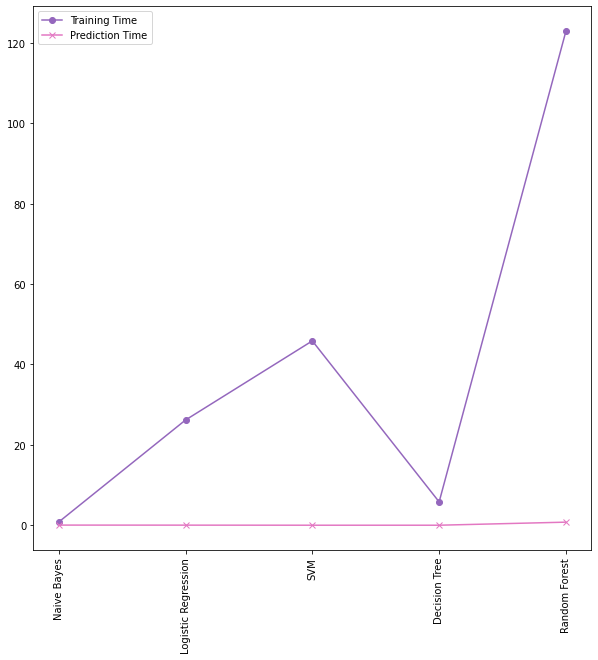

In [137]:
plt.figure(figsize=(10,10))
plt.plot(names,training_times,marker='o',color="#9467bd")
plt.plot(names,pred_time,marker='x',color="#e377c2")
plt.xticks(rotation=90)
plt.legend(['Training Time','Prediction Time'])
plt.savefig("Training Time And Prediction Time.png",dpi=500)
plt.show()